In [5]:
import sys
!{sys.executable} -m pip install aiohttp

In [28]:
import pandas as pd
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import os
import datashader
import datashader.transfer_functions
from datashader.utils import lnglat_to_meters
import holoviews
import geoviews
from holoviews.operation.datashader import datashade

import requests
import aiohttp

In [29]:
data= pd.read_csv('../complete_data/complete_data.csv', usecols=['latitude','longitude'])
data.head()

,latitude,longitude
0,34.05529,-117.75228
1,34.42083,-119.69819
2,34.68743,-116.78467
3,34.50030,-111.50098
4,42.41843,-71.10616


In [31]:
x_range = (min(data.latitude), max(data.latitude))
y_range = (min(data.longitude), max(data.longitude))
x_range, y_range

((34.05529, 42.41843), (-119.69819, -71.10616))

In [32]:
with ProgressBar():
    scene = datashader.Canvas(plot_width=600, plot_height=600,
    x_range=x_range, y_range=y_range)
    aggregation = scene.points(data, 'longitude',
    'latitude')
    image =datashader.transfer_functions.shade(aggregation)
    print(image)

<xarray.Image (latitude: 600, longitude: 600)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
Coordinates:
  * longitude  (longitude) float64 34.06 34.08 34.09 34.1 ... 42.38 42.4 42.41
  * latitude   (latitude) float64 -119.7 -119.6 -119.5 ... -71.31 -71.23 -71.15


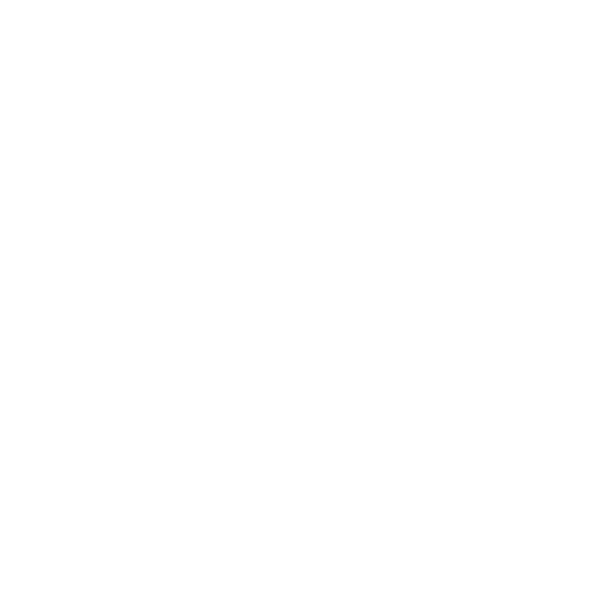

In [33]:
image

In [30]:
data.shape

(140383, 2)